# SADLLE POINT EQUATIONS

In [35]:
%pylab inline
import scipy.special
import scipy.integrate

Populating the interactive namespace from numpy and matplotlib


/home/davide/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 1 Cosine Kernel Distribution

In [36]:
def m1Integrand(theta,phi,m1,m2,eps,s,w):
    h=m1*cos(theta)+(eps*m2+s)*cos(phi)-w
    if h>0:
        return cos(theta)*h
    else:
        return 0

def m2Integrand(theta,phi,m1,m2,eps,s,w):
    h=m1*cos(theta)+(eps*m2+s)*cos(phi)-w
    if h>0:
        return cos(phi)*h
    else:
        return 0
    
def xIntegrand(theta,phi,m1,m2,eps,s,w):
    h=m1*cos(theta)+(eps*m2+s)*cos(phi)-w
    if h>0:
        return h
    else:
        return 0

def Fm1(m1,m2,eps,s,w,g):
    I=(scipy.integrate.dblquad(m1Integrand,0,(2*pi),lambda x:0,lambda x:2*pi,args=(m1,m2,eps,s,w)))[0]
    c=g/pow(2*pi,2)
    return c*I
    
def Fm2(m1,m2,eps,s,w,g):
    I=(scipy.integrate.dblquad(m2Integrand,0,(2*pi),lambda x:0,lambda x:2*pi,args=(m1,m2,eps,s,w)))[0]
    c=g/pow(2*pi,2)
    return c*I

def find_w(m1,m2,eps,s,g):
    w=m1+eps*m2+s
    maxt=1000
    tolerance=0.001
    converged=False
    exponent=0.5
    t=1
    while (not converged and t<maxt):
        eta=1.0/pow(t,exponent)
        x=g/pow(2*pi,2)*(scipy.integrate.dblquad(xIntegrand,0,(2*pi),lambda x:0,lambda x:2*pi,args=(m1,m2,eps,s,w)))[0]
        deltaw=x-1
        w=w+eta*deltaw
        t=t+1
        converged= abs(deltaw)<tolerance
        if t%100==0:
            print("step w: "+str(t))
    return w,x




In [37]:
def FindSaddlePoint(m1,m2,eps,s,g):
    t=1
    tmax=1000
    exponent=0.5
    converged=False
    tolerance=0.001
    
    while (not converged and t<tmax):
        eta=1.0/pow(t,exponent)
        
        m1_old=m1
        m2_old=m2
        
        w,x=find_w(m1,m2,eps,s,g)
        m1=(1.0-eta)*m1_old + eta*Fm1(m1_old,m2_old,eps,s,w,g)
        m2=(1.0-eta)*m2_old + eta*Fm2(m1_old,m2_old,eps,s,w,g)
        
        t=t+1
        dist=sqrt(pow(m1-m1_old,2)+pow(m2-m2_old,2))
        converged=(dist<tolerance)
        if t%100==0:
            print("step: "+str(t))
        
    return m1,m2,x,w

In [7]:
eps=0
s=0
g=3
m1zero=1
m2zero=0
m1,m2,x,w=FindSaddlePoint(m1zero,m2zero,eps,s,g)
print("m1="+str(m1)+" m2="+str(m2)+" x="+str(x)+" w="+str(w))

m1=0.7239822598126497 m2=-1.2131556224639295e-13 x=1.0000966391777595 w=-0.18938152488792967


In [47]:
eps=0
gs=linspace(1,3,21)
m1zero=0.7
m2zero=0
s=0
m1v=[]
m2v=[]
for g in gs:
    m1,m2,x,w=FindSaddlePoint(m1zero,m2zero,eps,s,g)
    print("m1="+str(m1)+" m2="+str(m2)+" x="+str(x)+" w="+str(w))
    m1v.append(m1)
    m2v.append(m2)

m1=0.007839307999746917 m2=5.137033555780034e-17 x=0.9994553555940426 w=-0.9996989279770998
m1=0.009776494431867783 m2=2.931622607429059e-17 x=1.0009003043542049 w=-0.9095690845339466
m1=0.012039126331906352 m2=3.3437926404592355e-17 x=1.0008110337242704 w=-0.8337026528360386
m1=0.015177406329881425 m2=1.7008927497746995e-17 x=1.0008234832447285 w=-0.7695280322536744
m1=0.019171857402135357 m2=2.0369012177101206e-17 x=1.0007164203581282 w=-0.7144392329338846
m1=0.0264091122943028 m2=4.4680656970190494e-17 x=0.9990676319933606 w=-0.6664620556441521
m1=0.03683555874284196 m2=3.2641038648385474e-17 x=0.9996925884033206 w=-0.6249333680108885
m1=0.05688002363771343 m2=2.7101268947492174e-17 x=0.9996625479749588 w=-0.5881877060598737
step: 100
m1=0.09830755129762271 m2=3.5988167642702754e-17 x=1.0006648571167718 w=-0.5556275874787435
step: 100
m1=0.21790035480210257 m2=3.2032896608917176e-17 x=1.0008062166266065 w=-0.5263795629776669
m1=0.5269127991095569 m2=-1.3895534407997941e-13 x=0.99961

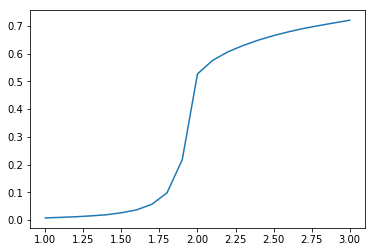

In [49]:
plot(gs,m1v)
#plot(s,m2v)

In [7]:
f=open("s_transition_1cos_g2p1.txt","w")
for i in range(len(s)):
    f.write(str(s[i])+" "+str(m1v[i])+" "+str(m2v[i])+"\n")
f.close()

In [16]:
f=open("s_transition_1cos_g2p1.txt","r")
s0=[]
m0=[]
for l in f.readlines():
    s0.append(float(l.strip().split()[0]))
    m0.append(float(l.strip().split()[1]))
    
f=open("s_transition_1cos_g2.5.txt","r")
s1=[]
m1=[]
for l in f.readlines():
    s1.append(float(l.strip().split()[0]))
    m1.append(float(l.strip().split()[1]))

f=open("s_transition_1cos_g3.txt","r")
s2=[]
m2=[]
for l in f.readlines():
    s2.append(float(l.strip().split()[0]))
    m2.append(float(l.strip().split()[1]))

f=open("s_transition_1cos_g4.txt","r")
s3=[]
m3=[]
for l in f.readlines():
    s3.append(float(l.strip().split()[0]))
    m3.append(float(l.strip().split()[1]))

f=open("s_transition_1cos_g4p5.txt","r")
s4=[]
m4=[]
for l in f.readlines():
    s4.append(float(l.strip().split()[0]))
    m4.append(float(l.strip().split()[1]))
    

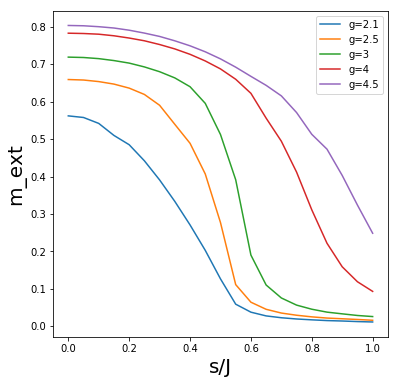

In [14]:
fig=figure(figsize(6,6))
plot(s0,m0,label="g=2.1")
plot(s1,m1,label="g=2.5")
plot(s2,m2,label="g=3")
plot(s3,m3,label="g=4")
plot(s4,m4,label="g=4.5")
xlabel("s/J",fontsize=20)
ylabel("m_ext",fontsize=20)
legend()
#plt.savefig('s_transition_1cos_distr_mext.eps', format='eps', dpi=1200)

In [20]:
#Susceptibility study
s0c=[(s0[i-1]+s0[i])/2 for i in range(1,len(s0))]
Xs0=[m0[i-1]-m0[i] for i in range(1,len(m0))]
s1c=[(s1[i-1]+s1[i])/2 for i in range(1,len(s1))]
Xs1=[m1[i-1]-m1[i] for i in range(1,len(m1))]
s2c=[(s2[i-1]+s2[i])/2 for i in range(1,len(s2))]
Xs2=[m2[i-1]-m2[i] for i in range(1,len(m2))]
s3c=[(s3[i-1]+s3[i])/2 for i in range(1,len(s3))]
Xs3=[m3[i-1]-m3[i] for i in range(1,len(m3))]
s4c=[(s4[i-1]+s4[i])/2 for i in range(1,len(s4))]
Xs4=[m4[i-1]-m4[i] for i in range(1,len(m4))]

In [22]:
len(s0c)

20

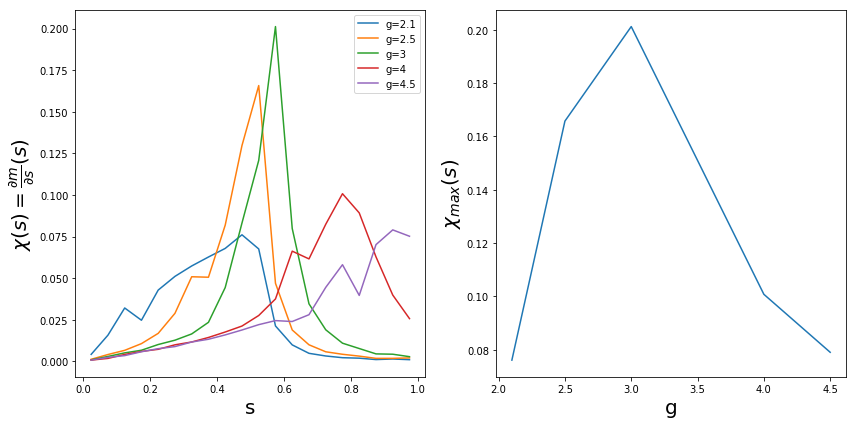

In [34]:
fig=figure(figsize(12,6))
subplot(1,2,1)
plot(s0c,Xs0,label="g=2.1")
plot(s1c,Xs1,label="g=2.5")
plot(s2c,Xs2,label="g=3")
plot(s3c,Xs3,label="g=4")
plot(s4c,Xs4,label="g=4.5")
xlabel("s",fontsize=20)
ylabel(r"$\chi(s)=\frac{\partial m}{\partial s}(s)$",fontsize=20)
legend()
subplot(1,2,2)
gs=[2.1,2.5,3,4,4.5]
Xmax=[max(Xs0),max(Xs1),max(Xs2),max(Xs3),max(Xs4)]
plot(gs,Xmax,label="g=4.5")
xlabel("g",fontsize=20)
ylabel(r"$\chi_{max}(s)$",fontsize=20)
tight_layout()

# BINARY DISTRIBUTION

In [1]:
def m1field(eta1,eta2,m1,m2,eps,s,a,w):
    h=m1*eta1/a+(eps*m2+s)*eta2/a-w
    if h>0:
        return h*(eta1/a-1)
    else:
        return 0
    
def m2field(eta1,eta2,m1,m2,eps,s,a,w):
    h=m1*eta1/a+(eps*m2+s)*eta2/a-w
    if h>0:
        return h*(eta2/a-1)
    else:
        return 0

def xIntegrand(eta1,eta2,m1,m2,eps,s,a,w):
    h=m1*eta1/a+(eps*m2+s)*eta2/a-w
    if h>0:
        return h
    else:
        return 0

def Fm1(m1,m2,eps,s,a,w,g):
    I=a*a*m1field(1,1,m1,m2,eps,s,a,w)+a*(1-a)*m1field(1,0,m1,m2,eps,s,a,w)+(1-a)*a*m1field(0,1,m1,m2,eps,s,a,w)+(1-a)*(1-a)*m1field(0,0,m1,m2,eps,s,a,w)
    return g*I

def Fm2(m1,m2,eps,s,a,w,g):
    I=a*a*m2field(1,1,m1,m2,eps,s,a,w)+a*(1-a)*m2field(1,0,m1,m2,eps,s,a,w)+(1-a)*a*m2field(0,1,m1,m2,eps,s,a,w)+(1-a)*(1-a)*m2field(0,0,m1,m2,eps,s,a,w)
    return g*I

def find_w(m1,m2,eps,s,a,g):
    w=m1+eps*m2+s
    maxt=1000
    tolerance=0.001
    converged=False
    exponent=0.5
    t=1
    while (not converged and t<maxt):
        eta=1.0/pow(t,exponent)
        I=a*a*xIntegrand(1,1,m1,m2,eps,s,a,w)+a*(1-a)*xIntegrand(1,0,m1,m2,eps,s,a,w)+(1-a)*a*xIntegrand(0,1,m1,m2,eps,s,a,w)+(1-a)*(1-a)*xIntegrand(0,0,m1,m2,eps,s,a,w)
        x=g*I
        deltaw=x-a
        w=w+eta*deltaw
        t=t+1
        converged= abs(deltaw)<tolerance
        #if t%100==0:
        #    print("step w: "+str(t))
    return w,x


In [2]:
def FindSaddlePoint(m1,m2,eps,s,a,g):
    t=1
    tmax=1000
    exponent=0.5
    converged=False
    tolerance=0.001
    
    while (not converged and t<tmax):
        eta=1.0/pow(t,exponent)
        
        m1_old=m1
        m2_old=m2
        
        w,x=find_w(m1,m2,eps,s,a,g)
        m1=(1.0-eta)*m1_old + eta*Fm1(m1_old,m2_old,eps,s,a,w,g)
        m2=(1.0-eta)*m2_old + eta*Fm2(m1_old,m2_old,eps,s,a,w,g)
        
        t=t+1
        dist=sqrt(pow(m1-m1_old,2)+pow(m2-m2_old,2))
        converged=(dist<tolerance)
        #if t%100==0:
            #print("step: "+str(t))
        
    return m1,m2,x

In [137]:
eps=1
a=0.5
s=0
g=1.5
m1zero=0.1
m2zero=0
m1,m2,x=FindSaddlePoint(m1zero,m2zero,eps,s,a,g)
print("m1="+str(m1)+" m2="+str(m2)+" x="+str(x))

m1=0.4971857039530113 m2=0.0 x=0.49903284414135046


In [7]:
eps=0
a=0.5
gs=asarray([1.2,1.5,1.8])
m1zero=0.1
m2zero=0
sbin=linspace(0,1,41)
m1bin=[]
m2bin=[]
for g in gs:
    m1temp=[]
    m2temp=[]
    for i in sbin:
        m1,m2,x=FindSaddlePoint(m1zero,m2zero,eps,i,a,g)
        #print("m1="+str(m1)+" m2="+str(m2)+" x="+str(x))
        m1temp.append(m1/x)
        m2temp.append(m2/x)
        
    m1bin.append(m1temp)
    m2bin.append(m2temp)
    

Text(0,0.5,'Overlap')

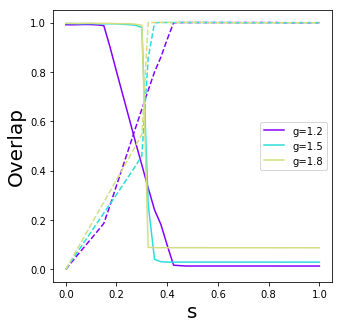

In [18]:
fig=figure(figsize=(5,5))
cm = pylab.get_cmap('rainbow')
for i in range(len(gs)):
    plot(sbin,m1bin[i],label="g="+str(gs[i]),c=cm(1.*i/len(gs)))
    plot(sbin,m2bin[i],linestyle='--',c=cm(1.*i/len(gs)))
legend()
xlabel("s",fontsize=20)
ylabel("Overlap",fontsize=20)

In [206]:
eps=0
a=0.1
g=((a/(1-a))+(1/(1-a)))/2
gs=linspace(1.1,1.9,5)
m1zero=0.1
m2zero=0
sbin=linspace(0,1,21)
m1bin=[]
m2bin=[]
for i in sbin:
    m1,m2,x=FindSaddlePoint(m1zero,m2zero,eps,i,a,g)
    #print("m1="+str(m1)+" m2="+str(m2)+" x="+str(x))
    m1bin.append(m1/x)
    m2bin.append(m2/x)
        
   

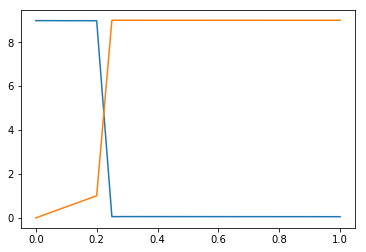

In [207]:
plot(sbin,m1bin)
plot(sbin,m2bin)

In [197]:
#g bounds for given a
a=0.3
print(a/(1-a))
print(1/(1-a))

0.4285714285714286
1.4285714285714286
